In [2]:
from torch import tensor

# Basic Structure of Matrix solution of Schrodinger equation

## Finite difference method



$$\left. \frac{d^2 f}{d x^2}\right|_{x= x_i} \approx \frac{1}{\Delta x^2} (f(x_{i-1}) -2 f(x_{i}) + f(x_{i+1}))$$

For higher terms
See [finite difference coeffficents](https://en.wikipedia.org/wiki/Finite_difference_coefficient)



### Conver Schrodinger equation with difference form

$$- \frac{\hbar}{2m} \frac{d^2}{d x^2} \psi  + V \psi = E \psi$$

$$- \frac{\hbar}{2m} \frac{1}{\Delta x^2} (\psi (x_{i-1}) -2 \psi (x_{i}) + \psi (x_{i+1}))  + V(x_i) \psi(x_i) = E \psi(x_i)$$

$$H \psi = E \psi$$


$$H = K +V = \begin{bmatrix}
\frac{\hbar}{m} + V(x_0) & - \frac{\hbar}{2m} & 0 & \cdots & 0 \\
- \frac{\hbar}{2m} & \frac{\hbar}{m} + V(x_1) & - \frac{\hbar}{2m} & \cdots & 0 \\
0 &- \frac{\hbar}{2m} & \frac{\hbar}{m} + V(x_1) & \cdots & 0 \\
\vdots & \vdots & \ddots & \cdots & 0\\
0   &  \cdots &   - \frac{\hbar}{2m} & \frac{\hbar}{m} + V(x_n) &  - \frac{\hbar}{2m}\\
0   &  \cdots &   0 &- \frac{\hbar}{2m} & \frac{\hbar}{m} + V(x_n)\\
\end{bmatrix}$$


$$\begin{bmatrix}
\frac{\hbar}{m} + V(x_0) & - \frac{\hbar}{2m} & 0 & \cdots & 0 \\
- \frac{\hbar}{2m} & \frac{\hbar}{m} + V(x_1) & - \frac{\hbar}{2m} & \cdots & 0 \\
0 &- \frac{\hbar}{2m} & \frac{\hbar}{m} + V(x_1) & \cdots & 0 \\
\vdots & \vdots & \ddots & \cdots & 0\\
0   &  \cdots &   - \frac{\hbar}{2m} & \frac{\hbar}{m} + V(x_n) &  - \frac{\hbar}{2m}\\
0   &  \cdots &   0 &- \frac{\hbar}{2m} & \frac{\hbar}{m} + V(x_n)\\
\end{bmatrix}
\begin{bmatrix}
\psi(x_0)\\
\psi(x_1)\\
\psi(x_2)\\
\vdots\\
\psi(x_{n-1})\\
\psi(x_n)\\
\end{bmatrix}
=E
\begin{bmatrix}
\psi(x_0)\\
\psi(x_1)\\
\psi(x_2)\\
\vdots\\
\psi(x_{n-1})\\
\psi(x_n)\\
\end{bmatrix}
$$
- $\vec{\psi}_i = \psi(x_i)$
- $V_{ii} = V(x_i)$



In [119]:
import numpy as np
from scipy import linalg as scilalg

In [120]:
def np_off_dig(mat, i:int, vals):
    n, m = mat.shape
    if i==0:
        np.fill_diagonal(mat, vals)
    if i >0:
        np.fill_diagonal(mat[:-i, i:], vals)
    if i< 0:
        np.fill_diagonal(mat[-i:, :i], vals)
def np_get_off_dig(i, vals):
    l = len(vals) + abs(i)
    m = np.zeros((l,l))
    np_off_dig(m, i, vals)
    return m
    

In [121]:
np_get_off_dig(-2, [1,2,3,4,5])

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 0.],
       [0., 0., 0., 0., 5., 0., 0.]])

In [153]:
L = 10
dx = 0.1
N = int(L/dx)
print(N)
xline = np.arange(N)*dx - L/2
xline

100


array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
       -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9])

In [174]:
hm = 200 # h/m
vx = lambda x: x**2
K = np_get_off_dig(-1, -hm*np.ones(N-1)/2) + np_get_off_dig(1, -hm*np.ones(N-1)/2) + hm*np.eye(N)
V = np.eye(N)
np.fill_diagonal(V, vx(xline)) 
H = K + V

In [175]:
result = np.linalg.eig(H)

In [176]:
h, v = scilalg.eigh(H)

In [177]:
import matplotlib.pyplot as plt

In [178]:
v.shape

(100, 100)

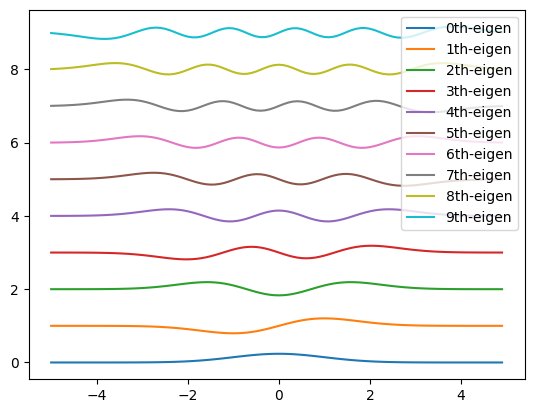

In [179]:
for i in range(10):
    e =v[:,i]
    plt.plot(xline, (e)+i, label=f"{i}th-eigen")
plt.legend()
#plt.xlim(-1, 1)

In [129]:
e.shape

(3, 100)

## NN model

In [1]:
import torch
from torch import nn
torch.set_default_dtype(torch.float64)
torch.set_default_tensor_type(torch.DoubleTensor)

from matplotlib import pyplot as plt

f_dim_coefs = [
    [-2,        1],
    [-2.5,      4/3,    -1/12],
    [-49/18,    3/2, 	-3/20, 	1/90]
]

def get_kinetic(N, order=0, dx=1):
    assert order <3, "Supported order is under 3"
    K = torch.zeros(N, N)
    for i, coef in enumerate(f_dim_coefs[order]):
        if i == 0:
            K = K+coef*torch.eye(N)
        else:
            arr = coef*torch.ones(N-i)
            K = K + coef*(torch.diag(arr , i) + torch.diag(arr , -i))
    return K/(dx**2)

/Users/hyunseongkim/miniconda3/envs/ml/lib/python3.11/site-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/tensor/python_tensor.cpp:453.)
  _C._set_default_tensor_type(t)


In [3]:
get_kinetic(5, 1)

tensor([[-2.5000,  1.7778,  0.0069,  0.0000,  0.0000],
        [ 1.7778, -2.5000,  1.7778,  0.0069,  0.0000],
        [ 0.0069,  1.7778, -2.5000,  1.7778,  0.0069],
        [ 0.0000,  0.0069,  1.7778, -2.5000,  1.7778],
        [ 0.0000,  0.0000,  0.0069,  1.7778, -2.5000]])

In [211]:
N = 200
L = 5
xline  = torch.linspace(-L/2, L/2, N)
dx = xline[1]-xline[0]
 
coef = 0.35
vx = 100*((xline-coef*L)**2)# *(xline+coef*L)**2 #- (xline-L/2)**3 # (xline)**2

vx = vx - vx.min()
vx = vx/vx.max()

vx_fft = torch.fft.fft(vx)
V = torch.diag(vx) 
K = get_kinetic(N, 0, dx)
H = K+V

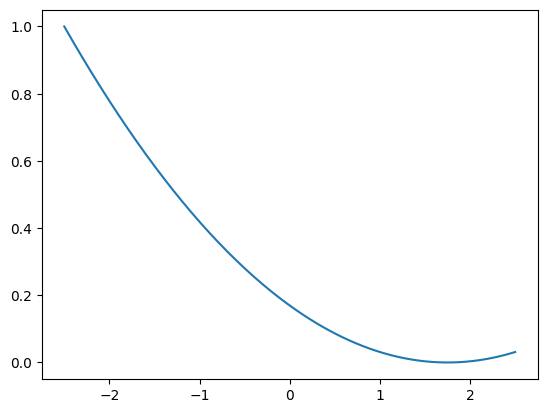

In [212]:
plt.plot(xline, vx )

In [213]:
def get_eighs(H):
    evals, evecs = torch.linalg.eigh(H.to(torch.float64))
    return evals, evecs

In [214]:
evals, evec = get_eighs(H)

In [281]:
evals.max(), evals.min()

(tensor(-0.1415), tensor(-6335.5827))

In [215]:
import matplotlib.pyplot as plt

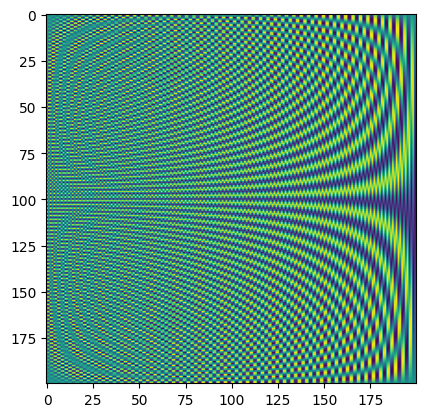

In [216]:
plt.imshow(evec.real.detach())

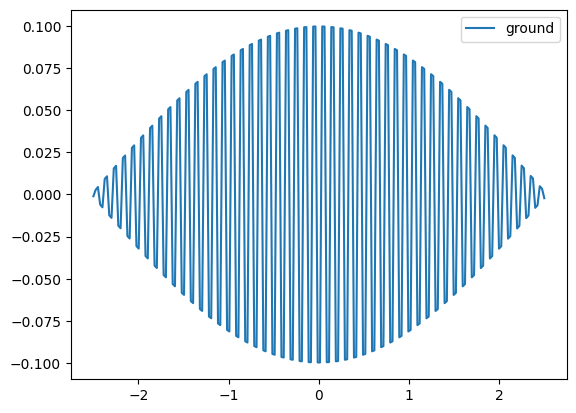

In [217]:
#plt.plot(xline, 0.01*vx)
plt.plot(xline, torch.real(evec[0]).detach(), label="ground")
#plt.plot(xline, evec[1].real.detach(), label="1st")
#plt.plot(xline, evec[2].real.detach(), label="2nd")
#plt.plot(xline, evec[3].real.detach(), label="3rd")
plt.legend()

In [218]:
v_true = vx_fft

In [219]:
from torch import nn
torch.set_default_dtype(torch.float64)
torch.set_default_tensor_type(torch.DoubleTensor)

In [220]:
class VModule(nn.Module):
    def __init__(self, *args, **kwargs):
        super(VModule, self).__init__(*args, **kwargs)
        self.vx_fft = vx_fft

        self.layer = nn.Sequential(
            nn.Linear(N,    1000), nn.ReLU(),
            nn.Linear(1000,  500), nn.ReLU(),
            nn.Linear(500,  1000), nn.ReLU(),
            nn.Linear(1000, N)
        )
    def forward(self, x):
        x = x.view(N)
        return self.layer(x).view(N)


In [272]:
module = VModule()

In [273]:
xline.min(), xline.max()

(tensor(-2.5000), tensor(2.5000))

In [274]:
float(vx[0])-eps

0.99999

In [275]:
vx[-1]

tensor(0.0311)

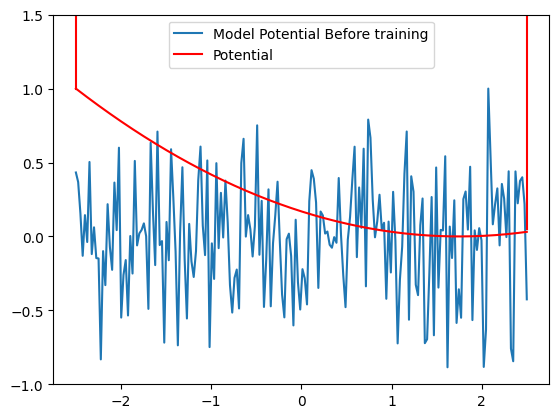

In [276]:
v = module(evals).detach()
eps=0.00001
plt.plot(xline, v/v.max(), label="Model Potential Before training")
plt.plot(xline, vx, label="Potential", c="r")
plt.axvline(float(xline.min()), 0.8, 10, c="r")
plt.axvline(float(xline.max()), 0.42, 10, c="r")
plt.ylim(-1, 1.5)
plt.legend()

In [277]:
L2loss = torch.nn.MSELoss(reduction="mean")
relu = nn.ReLU()
relu_e = lambda x, e: relu(x - e)

In [278]:
opt = torch.optim.Adam(module.parameters(), lr=0.2)

In [279]:
epoches = 16000
for epoch in range(epoches):

    v = module(evals)
    v = v-v.min()
    v = v/v.max()
    V = torch.diag(v)
    H_m = K+V
    evals_m, evec = get_eighs(H_m)
    max_diff = 0.1

    #loss_symmetry = L2loss(v, torch.flip(v, [0]))
    loss_dif = (1000/(epoch+2))*torch.max(relu_e(torch.diff(evals_m), max_diff))
    #print(loss_dif.item())
    # 양끝 1 whrjs
    loss_eigen = 200*L2loss(evals_m, evals)
    loss_v0 = (v[0]-1)**2
    
    loss = loss_eigen + loss_v0 + loss_dif #+ loss_symmetry
    print(f"{loss_eigen/loss:.3}|{loss_dif/loss:.3}|{0/loss:.3}")
    print(f"{epoch}:{loss.item()}")
    #loss = 200*L2loss(evals_m, evals) + (torch.max(v)-1)**2 + loss_dif
    

    opt.zero_grad()
    loss.backward()
    opt.step()

0.000269|1.0|0.0
0:24725.97032426925
0.00025|1.0|0.0
1:16609.510670769545
0.000432|1.0|0.0
2:12439.310069865134
0.000606|0.999|0.0
3:9939.827289905586
0.000746|0.999|0.0
4:8272.314930832723
0.00064|0.999|0.0
5:7079.506503231506
0.000541|0.999|0.0
6:6183.478751335133
0.000575|0.999|0.0
7:5500.074462128776
0.000489|0.999|0.0
8:4951.884489564551
0.000464|1.0|0.0
9:4500.697392927344
0.000423|1.0|0.0
10:4123.790063668651
0.00042|1.0|0.0
11:3804.8275254787904
0.000422|1.0|0.0
12:3531.5215227788635
0.000431|1.0|0.0
13:3296.0916820136495
0.000435|1.0|0.0
14:3090.7930481768253
0.000447|1.0|0.0
15:2909.3594842064117
0.000461|1.0|0.0
16:2747.9085851293667
0.000478|1.0|0.0
17:2603.340916681525
0.000499|0.999|0.0
18:2473.1657786478418
0.000519|0.999|0.0
19:2355.3393919461178
0.000542|0.999|0.0
20:2248.199347541086
0.000569|0.999|0.0
21:2150.3617875157065
0.000596|0.999|0.0
22:2060.6645926566794
0.000623|0.999|0.0
23:1978.1330348238882
0.000651|0.999|0.0
24:1901.9442591080792
0.000661|0.999|0.0
25:1

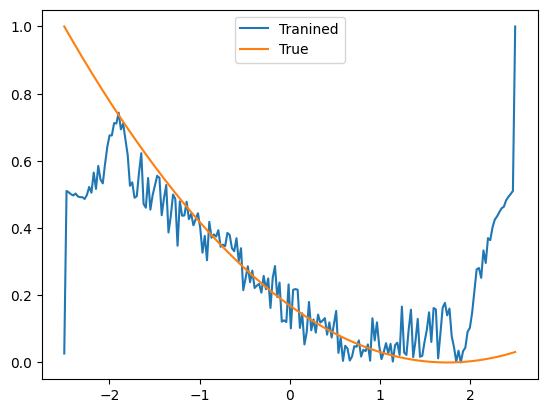

In [280]:
v_model = module(evals).detach()
v_model = v_model-v_model.min()
v_model = v_model/v_model.max()

plt.plot(xline, torch.flip(v.detach(), [0]), label="Tranined")
plt.plot(xline, vx, label="True")
plt.legend()

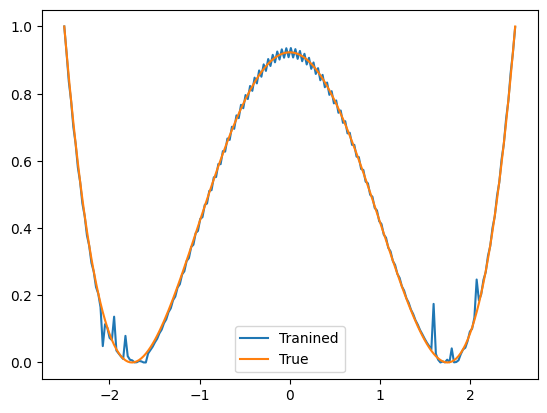

In [199]:
v_model = module(evals).detach()
v_model = v_model-v_model.min()
v_model = v_model/v_model.max()

plt.plot(xline, v.detach(), label="Tranined")
plt.plot(xline, vx, label="True")
plt.legend()

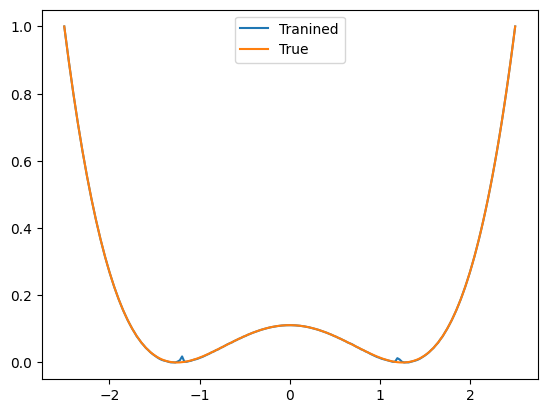

In [168]:
v_model = module(evals).detach()
v_model = v_model-v_model.min()
v_model = v_model/v_model.max()

plt.plot(xline, v.detach(), label="Tranined")
plt.plot(xline, vx, label="True")
plt.legend()

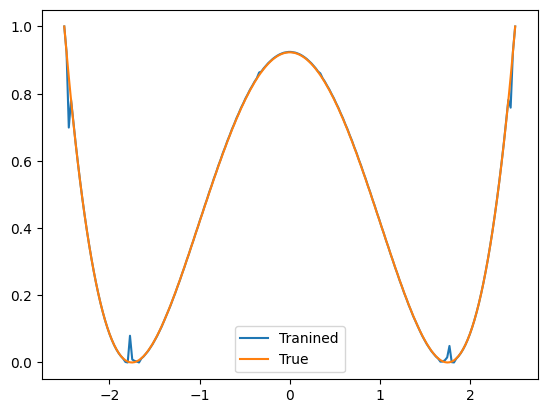

In [190]:
v_model = module(evals).detach()
v_model = v_model-v_model.min()
v_model = v_model/v_model.max()

plt.plot(xline, v.detach(), label="Tranined")
plt.plot(xline, vx, label="True")
plt.legend()

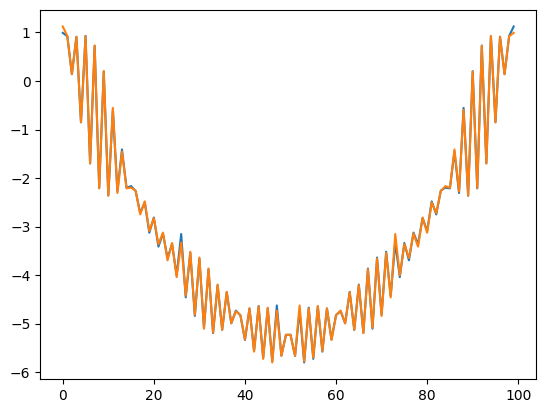

In [402]:
plt.plot(v.detach())
plt.plot(torch.flip(v, [0]).detach())


<StemContainer object of 3 artists>

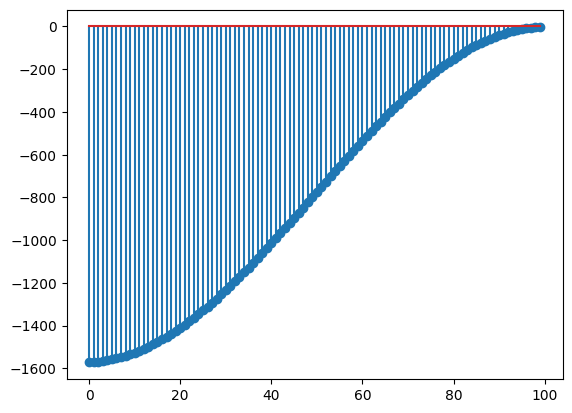

In [403]:
plt.stem(evals)

<StemContainer object of 3 artists>

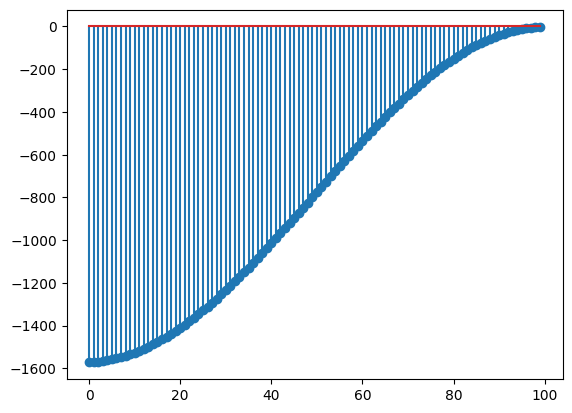

In [404]:
plt.stem(evals_m.detach())